## Dependencias

In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score


from sklearn.feature_selection import SelectKBest
#from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

from functools import reduce
from category_encoders import OneHotEncoder

cf.go_offline()
pd.set_option('display.max_columns', None)

## Lectura de datos

In [83]:
ruta = "/media/jose/090f6b94-de30-4aaf-9f8a-4e18b120d7f6/bd/01. Simples/Insurance claim fraud/insurancefraud.csv"

In [84]:
datos = pd.read_csv(ruta)
datos.shape

(15420, 33)

In [85]:
datos.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [86]:
datos.value_counts('FraudFound_P', normalize=True)

FraudFound_P
0    0.940143
1    0.059857
Name: proportion, dtype: float64

## Selección de variables de decisión (vector de características $\vec{x}$)

In [87]:
var = ['Make',
'PastNumberOfClaims',
'DriverRating',
'AgeOfVehicle',
'Age']
vart = ['FraudFound_P']

In [88]:
datos = datos[var+vart]

In [89]:

datos.head()

,Make,PastNumberOfClaims,DriverRating,AgeOfVehicle,Age,FraudFound_P
0,Honda,none,1,3 years,21,0
1,Honda,none,4,6 years,34,0
2,Honda,1,3,7 years,47,0
3,Toyota,1,2,more than 7,65,0
4,Honda,none,1,5 years,27,0


### Normalización de variables discretas 

In [90]:
datos['Make'] = np.where(datos['Make'].isin(['Pontiac','Toyota','Honda','Mazda','Chevrolet']),datos['Make'],'Other')
datos['AgeOfVehicle'] = np.where(datos['AgeOfVehicle'].isin(['7 years','more than 7','6 years']),datos['AgeOfVehicle'],'<=5')

## Partición de datos

In [91]:
X = datos[var].copy()
y = datos[vart[0]].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10794, 5), (4626, 5), (10794,), (4626,))

### Codificación de categorías

In [92]:
vard = ['Make','PastNumberOfClaims','DriverRating','AgeOfVehicle']

In [93]:
oh = OneHotEncoder(cols=vard,use_cat_names=True)

In [94]:
oh.fit(X_train[vard])

OneHotEncoder(cols=['Make', 'PastNumberOfClaims', 'DriverRating',
                    'AgeOfVehicle'],
              use_cat_names=True)

In [95]:
oh.transform(X_train[vard])

,Make_Chevrolet,Make_Mazda,Make_Honda,Make_Toyota,Make_Pontiac,Make_Other,PastNumberOfClaims_none,PastNumberOfClaims_more than 4,PastNumberOfClaims_2 to 4,PastNumberOfClaims_1,DriverRating_3.0,DriverRating_2.0,DriverRating_4.0,DriverRating_1.0,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_<=5,AgeOfVehicle_6 years
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
10790,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
10791,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
10792,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0


In [96]:
X_train[oh.get_feature_names_out()] = oh.transform(X_train[vard])

In [97]:
X_train.head()

,Make,PastNumberOfClaims,DriverRating,AgeOfVehicle,Age,Make_Chevrolet,Make_Mazda,Make_Honda,Make_Toyota,Make_Pontiac,Make_Other,PastNumberOfClaims_none,PastNumberOfClaims_more than 4,PastNumberOfClaims_2 to 4,PastNumberOfClaims_1,DriverRating_3.0,DriverRating_2.0,DriverRating_4.0,DriverRating_1.0,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_<=5,AgeOfVehicle_6 years
0,Chevrolet,none,3,7 years,41,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,Mazda,more than 4,3,more than 7,45,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,Mazda,2 to 4,2,more than 7,56,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,Honda,none,4,<=5,18,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,Honda,2 to 4,1,<=5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


## Aprendizaje

### Modelos lineales 

#### Clasificador Regresión Logística

In [98]:
lr= LogisticRegression()

#### Híper-parametrización

In [99]:
params = {
    'C':np.arange(0.01,0.1,0.01),
    'fit_intercept': [True, False],
    'max_iter': range(100,1000,100),
    'tol': [1e-3, 1e-4, 1e-5]
}
reduce(lambda x,y: x*y, [len(i) for i in params.values()])

486

In [100]:
grid = GridSearchCV(estimator=lr, param_grid=params, cv=3, n_jobs=-1, verbose=1, scoring='roc_auc')

In [101]:
grid.fit(X_train.drop(vard,axis=1), y_train)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


/home/jose/entornos/tsc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jose/entornos/tsc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

/home/jose/entornos/tsc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jose/entornos/tsc/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'fit_intercept': [True, False],
                         'max_iter': range(100, 1000, 100),
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='roc_auc', verbose=1)

In [102]:
lr = grid.best_estimator_
lr

LogisticRegression(C=0.09, tol=0.001)

#### Aprendizaje de parámetros $\vec{\theta},\theta_0$

In [103]:
lr.fit(X_train.drop(vard,axis=1), y_train)

LogisticRegression(C=0.09, tol=0.001)

In [104]:
lr.intercept_, lr.coef_

(array([-2.52800493]),
 array([[-0.00632811,  0.00417612, -0.20083715, -0.02562609, -0.01357145,
         -0.10893714,  0.34828483,  0.34267332, -0.46183303,  0.00689044,
          0.11575838,  0.03310934, -0.00397243,  0.00899037, -0.03463816,
         -0.12095367, -0.10450027,  0.17303394,  0.05590911]]))

#### Generalización del modelo

In [105]:
X_test[oh.get_feature_names_out()] = oh.transform(X_test[vard])

In [106]:
accuracy_score(y_train, lr.predict(X_train.drop(vard,axis=1))),accuracy_score(y_test, lr.predict(X_test.drop(vard,axis=1)))

(0.9387622753381508, 0.9433635970600951)

In [107]:
display(confusion_matrix(y_train, lr.predict(X_train.drop(vard,axis=1))))
display(confusion_matrix(y_test, lr.predict(X_test.drop(vard,axis=1))))

array([[10133,     0],
       [  661,     0]])

array([[4364,    0],
       [ 262,    0]])

In [108]:
display(roc_auc_score(y_true=y_train, y_score=lr.predict_proba(X_train.drop(vard,axis=1))[:,1]))
display(roc_auc_score(y_true=y_test, y_score=lr.predict_proba(X_test.drop(vard,axis=1))[:,1]))

0.5978875808031546

0.5708686966925784

In [109]:
X_train

,Make,PastNumberOfClaims,DriverRating,AgeOfVehicle,Age,Make_Chevrolet,Make_Mazda,Make_Honda,Make_Toyota,Make_Pontiac,Make_Other,PastNumberOfClaims_none,PastNumberOfClaims_more than 4,PastNumberOfClaims_2 to 4,PastNumberOfClaims_1,DriverRating_3.0,DriverRating_2.0,DriverRating_4.0,DriverRating_1.0,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_<=5,AgeOfVehicle_6 years
0,Chevrolet,none,3,7 years,41,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,Mazda,more than 4,3,more than 7,45,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,Mazda,2 to 4,2,more than 7,56,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,Honda,none,4,<=5,18,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,Honda,2 to 4,1,<=5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,Toyota,2 to 4,1,<=5,32,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
10790,Other,2 to 4,2,7 years,43,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
10791,Other,1,4,more than 7,43,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
10792,Pontiac,1,2,more than 7,80,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0


## Uso del Modelo

In [128]:
reporte_t = y_train.to_frame()
reporte_t['proba'] = lr.predict_proba(X_train.drop(vard,axis=1))[:,1]
reporte_t['r_proba'] = pd.cut(reporte_t['proba'], bins=np.arange(0,1.05,0.05), include_lowest=True).astype(str)
reporte_t.insert(0,'muestra','ent')
reporte_t.drop('proba',axis=1,inplace=True)

In [129]:
reporte_v = y_test.to_frame()
reporte_v['proba'] = lr.predict_proba(X_test.drop(vard,axis=1))[:,1]
reporte_v['r_proba'] = pd.cut(reporte_v['proba'], bins=np.arange(0,1.05,0.05), include_lowest=True).astype(str)
reporte_v.insert(0,'muestra','prueba')
reporte_v.drop('proba',axis=1,inplace=True)

In [132]:
pd.concat([reporte_t,reporte_v],ignore_index=True).assign(n=1).groupby(['muestra','r_proba','FraudFound_P']).count().to_clipboard()

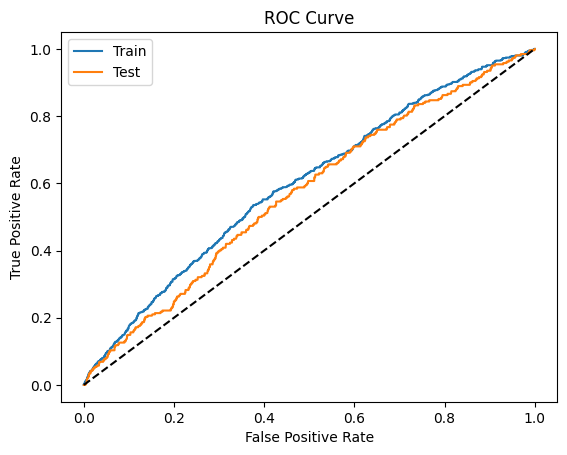

In [134]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities of positive class
y_train_prob = lr.predict_proba(X_train.drop(vard,axis=1))[:, 1]
y_test_prob = lr.predict_proba(X_test.drop(vard,axis=1))[:, 1]

# calculate fpr and tpr for different threshold values
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# plot ROC curve
plt.plot(fpr_train, tpr_train, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
